# DEEP LEARNING
## Pytorch Basic


In [74]:
import torch

In [75]:
torch.cuda.is_available()

False

In [76]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [77]:
df = pd.read_csv('./Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [78]:
df.shape

(150, 6)

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
X = df.drop(['Species'], axis=1).values
y = le.fit_transform(df['Species'].values)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train).reshape(-1,1)
y_test = torch.LongTensor(y_test).reshape(-1,1)

In [80]:
len(y_train)

120

In [81]:
labels, counts = torch.unique(y_train, return_counts=True)
print(labels, counts)

tensor([0, 1, 2]) tensor([40, 41, 39])


In [82]:
x = torch.tensor(2.0, requires_grad=True)
print(x)
print(x.grad)

tensor(2., requires_grad=True)
None


In [83]:
y = 2*x**4 + x**3 + 3*x**2 + 5*x + 1
print(y)

tensor(63., grad_fn=<AddBackward0>)


In [84]:
y.grad_fn

In [85]:
#thuc hien lan truyen nguoc va tinh toan cac gradient
y.backward()

In [86]:
#8x^3 + 3x^2 + 6x + 5
x.grad

tensor(93.)

# btvn 1:

cho y= 5x^5 + 6x^3 - 3x + 1
cho biet do doc cua da thuc o diem nao

In [87]:
x = torch.tensor(2.0, requires_grad=True)
y = 5*x**5 + 6*x**3 - 3*x + 1
y.backward()
print("Độ dốc của đa thức tại x = 2 là:",x.grad.item())

Độ dốc của đa thức tại x = 2 là: 469.0


# btvn 2:

Tạo 1 tensor ban đầu có giá trị là 2
định nghĩa hàm số và tính gradient
y = x^3 + 2x^2 +5x + 1
hãy tính dy/dx tại giá trị của x
dùng phương pháp gradient decent với learning rate = 0.1 để cập nhật giá trị x trong 10 vòng lặp



In [88]:
x = torch.tensor(2.0, requires_grad=True)
lr = 0.1

for i in range(10):

    if x.grad is not None:
        x.grad.zero_()

    y = x**3 + 2*x**2 + 5*x + 1
    y.backward()
    with torch.no_grad():
        x -= lr * x.grad

    print(f"Vòng {i+1}: x = {x.item():.4f}, dy/dx = {x.grad.item():.4f}")

Vòng 1: x = -0.5000, dy/dx = 25.0000
Vòng 2: x = -0.8750, dy/dx = 3.7500
Vòng 3: x = -1.2547, dy/dx = 3.7969
Vòng 4: x = -1.7251, dy/dx = 4.7040
Vòng 5: x = -2.4278, dy/dx = 7.0274
Vòng 6: x = -3.7250, dy/dx = 12.9717
Vòng 7: x = -6.8977, dy/dx = 31.7268
Vòng 8: x = -18.9120, dy/dx = 120.1433
Vòng 9: x = -119.1464, dy/dx = 1002.3439
Vòng 10: x = -4330.7476, dy/dx = 42116.0117


# btvn 3:
tạo một tập giữ liệu với x là số giờ học ngẫu nhiên từ 1 - 10 và y là số điểm được tính theo công thức y = 3x + 5 + noise 
với noise là một giá trị ngẫu nhiên nhỏ

1. khởi tạo tham số w và b ngầu nhiên đối với gradient_grad = True
2. tính MSE
3. tính gradient
4. cập nhật tham số w và b bằng Gradient Decent với learning rate alpha = 0.01
5. lặp lại quas trình trên trong vòng 100 vòng lặp để xem sự hội tụ của mô hình

In [89]:
# 1. tạo dữ liệu và tham số w và b
torch.manual_seed(42)
x = torch.rand(50, 1) * 9 + 1      
noise = torch.randn(50, 1) * 0.1 
y = 3 * x + 5 + noise
w = torch.randn(1, requires_grad=True)
b = torch.randn(1, requires_grad=True)


# 2. định nghĩa hàm MSE
y_pred = w * x + b
mse = ((y_pred - y) ** 2).mean()
print("MSE =", mse.item())


# 3. tính gradient
mse.backward()
print('Gradient')
print(w.grad.item())
print(b.grad.item())


# 4. cập nhật tham số bằng gradient descent
alpha = 0.01
with torch.no_grad():
    w -= alpha * w.grad
    b -= alpha * b.grad
print('Cập nhật tham số w và b bằng Gradient Decent với learning rate =', alpha)
print(w.grad.zero_())
print(b.grad.zero_())


# 5. lặp lại quá trình 
losses = []
print('Lập lại quá trình')
for epoch in range(100):
    # forward
    y_pred = w * x + b
    loss = ((y_pred - y) ** 2).mean()
    losses.append(loss.item())

    # backward
    loss.backward()

    # update
    with torch.no_grad():
        w -= alpha * w.grad
        b -= alpha * b.grad

    # reset gradient
    w.grad.zero_()
    b.grad.zero_()


    print(f"Epoch {epoch+1}: Loss={loss.item():.4f}, w={w.item():.4f}, b={b.item():.4f}")


MSE = 818.6637573242188
Gradient
-373.7590637207031
-54.4395751953125
Cập nhật tham số w và b bằng Gradient Decent với learning rate = 0.01
tensor([0.])
tensor([0.])
Lập lại quá trình
Epoch 1: Loss=16.1982, w=3.6359, b=0.0538
Epoch 2: Loss=3.6415, w=3.6924, b=0.0758
Epoch 3: Loss=3.4265, w=3.6977, b=0.0905
Epoch 4: Loss=3.4044, w=3.6967, b=0.1042
Epoch 5: Loss=3.3855, w=3.6949, b=0.1178
Epoch 6: Loss=3.3667, w=3.6930, b=0.1314
Epoch 7: Loss=3.3480, w=3.6911, b=0.1449
Epoch 8: Loss=3.3295, w=3.6892, b=0.1583
Epoch 9: Loss=3.3110, w=3.6873, b=0.1718
Epoch 10: Loss=3.2926, w=3.6854, b=0.1851
Epoch 11: Loss=3.2744, w=3.6835, b=0.1985
Epoch 12: Loss=3.2562, w=3.6816, b=0.2118
Epoch 13: Loss=3.2381, w=3.6797, b=0.2251
Epoch 14: Loss=3.2202, w=3.6778, b=0.2383
Epoch 15: Loss=3.2023, w=3.6760, b=0.2515
Epoch 16: Loss=3.1845, w=3.6741, b=0.2647
Epoch 17: Loss=3.1669, w=3.6722, b=0.2778
Epoch 18: Loss=3.1493, w=3.6704, b=0.2909
Epoch 19: Loss=3.1318, w=3.6685, b=0.3040
Epoch 20: Loss=3.1145, w=3

Epoch 99: Loss=2.0077, w=3.5358, b=1.2390
Epoch 100: Loss=1.9966, w=3.5344, b=1.2494


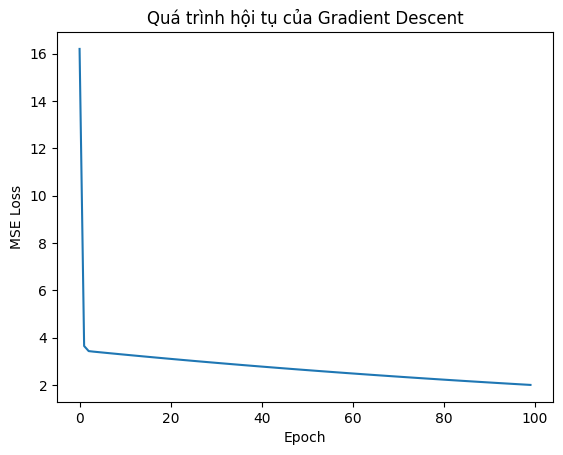

In [90]:
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.title("Quá trình hội tụ của Gradient Descent")
plt.show()

In [91]:
torch.__version__

'2.7.1+cpu'

In [92]:
import torch
import numpy as np

In [93]:
arr = np.array([1,2,3,4,5])

print(arr)
print(arr.dtype)
print(type(arr))


[1 2 3 4 5]
int64
<class 'numpy.ndarray'>


In [94]:
x = torch.from_numpy(arr)
print(x)

tensor([1, 2, 3, 4, 5])


In [95]:
print(x.dtype)

torch.int64


In [96]:
print(x.type())

torch.LongTensor


In [97]:
arr2 = np.arange(0.,12.).reshape(4,3)
arr2

array([[ 0.,  1.,  2.],
       [ 3.,  4.,  5.],
       [ 6.,  7.,  8.],
       [ 9., 10., 11.]])

In [98]:
x2 = torch.from_numpy(arr2)
print(x2)
print(x2.type())

tensor([[ 0.,  1.,  2.],
        [ 3.,  4.,  5.],
        [ 6.,  7.,  8.],
        [ 9., 10., 11.]], dtype=torch.float64)
torch.DoubleTensor


In [99]:
# copy and sharing

x = torch.from_numpy(arr)
print(x)

tensor([1, 2, 3, 4, 5])


In [100]:
arr[0] = 99
arr

array([99,  2,  3,  4,  5])

In [101]:
# th 1
arr = np.arange(0,5)
x = torch.from_numpy(arr)
print(x)

tensor([0, 1, 2, 3, 4])


In [102]:
# th 2
arr[0] = 99
print(x)

tensor([99,  1,  2,  3,  4])


# btvn 04: giải thích hai trường hợp trên:

ở trường hợp 1: array "arr" là một dãy numpy từ 0 đến 4, được chuyển đổi từ một dãy numpy thành tensor của pytorch mang giá trị "x"

ở trường hợp 2: giá trị đầu tiên của array "arr" được đổi thành 99, vì numpy và tensor dùng chung bộ nhớ, nên việc cập nhật giá trị đầu tiên của arr cũng sẽ đồng thời cập nhật giá trị đầu tiên của X




# btvn 05:  tao tensor voi

1. empyty
2. zeros
3. ones
4. random
5. reshape voi view va view as

In [104]:
# 1
a = torch.empty(3, 3)
print(a)


tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])


In [ ]:
# 2 
b = torch.zeros(3, 3)
print(b)


tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])


In [ ]:
# 3
c = torch.ones(3, 3)
print(c)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])


In [109]:
# 4
d = torch.randn(3, 3)
print(d)

tensor([[ 0.2046,  0.7237,  0.1275],
        [-1.1140,  0.5139,  0.0760],
        [-0.0740, -0.3555,  0.3692]])


In [114]:
x = torch.arange(12)
y = x.view(3, 4)
z = y.view_as(x)

print(x)
print(y)
print(z)

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])
tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])
tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])
